In [2]:
from sklearn.model_selection import train_test_split
###
# Step 0: Load data
###

import os
import torch
from PIL import Image
from torchvision.transforms import ToTensor

base_dir = "traindata"
X = []
y = []
throwaway = []
torch.set_num_threads(16)
for class_type in sorted(os.listdir(base_dir)):
    if class_type == ".DS_Store": continue
    subdir = os.path.join(base_dir, class_type)
    for filename in sorted(os.listdir(subdir)):
        if filename == ".DS_Store": continue
        filepath = os.path.join(subdir, filename)
        image = ToTensor()(Image.open(filepath)).unsqueeze(0)
        if list(image.size())[1:] == [3, 300, 300]:
            X.append(image)
            y.append(class_type)
        else:
            print(filepath, "is not size 300x300, image is:", image.size())
            throwaway.append(image)

X1, X2, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = torch.Tensor((len(X1), 3, 300, 300))
torch.cat(X1, out=X_train)
X_val = torch.Tensor((len(X2), 3, 300, 300))
torch.cat(X2, out=X_val)

traindata/cherry/cherry_0113.jpg is not size 300x300, image is: torch.Size([1, 3, 230, 219])
traindata/cherry/cherry_0226.jpg is not size 300x300, image is: torch.Size([1, 3, 169, 299])
traindata/cherry/cherry_0257.jpg is not size 300x300, image is: torch.Size([1, 3, 229, 220])
traindata/cherry/cherry_0366.jpg is not size 300x300, image is: torch.Size([1, 3, 193, 261])
traindata/cherry/cherry_0519.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0549.jpg is not size 300x300, image is: torch.Size([1, 3, 251, 201])
traindata/cherry/cherry_0745.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0843.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_0873.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_1005.jpg is not size 300x300, image is: torch.Size([1, 3, 225, 225])
traindata/cherry/cherry_1017.jpg is not size 300x300, image is: torch.

tensor([[[[0.3020, 0.3098, 0.3216,  ..., 0.5373, 0.5373, 0.5373],
          [0.2980, 0.3059, 0.3176,  ..., 0.5373, 0.5373, 0.5373],
          [0.2941, 0.2980, 0.3098,  ..., 0.5373, 0.5373, 0.5373],
          ...,
          [0.1608, 0.1608, 0.1608,  ..., 0.5294, 0.5294, 0.5255],
          [0.1608, 0.1608, 0.1608,  ..., 0.5255, 0.5216, 0.5176],
          [0.1608, 0.1608, 0.1608,  ..., 0.5216, 0.5176, 0.5137]],

         [[0.1020, 0.1098, 0.1216,  ..., 0.4118, 0.4118, 0.4118],
          [0.0980, 0.1059, 0.1176,  ..., 0.4118, 0.4118, 0.4118],
          [0.0941, 0.0980, 0.1098,  ..., 0.4118, 0.4118, 0.4118],
          ...,
          [0.0196, 0.0196, 0.0196,  ..., 0.2235, 0.2235, 0.2196],
          [0.0196, 0.0196, 0.0196,  ..., 0.2196, 0.2157, 0.2118],
          [0.0196, 0.0196, 0.0196,  ..., 0.2157, 0.2118, 0.2078]],

         [[0.0275, 0.0353, 0.0471,  ..., 0.3686, 0.3686, 0.3686],
          [0.0235, 0.0314, 0.0431,  ..., 0.3686, 0.3686, 0.3686],
          [0.0196, 0.0235, 0.0353,  ..., 0

In [3]:
print("X_train =", X_train.size()[0])
print("y_train =", len(y_train))
print("X_val =", X_val.size()[0])
print("y_val =", len(y_val))
print(len(throwaway), "images thrown out")

X_train = 3107
y_train = 3107
X_val = 1332
y_val = 1332
61 images thrown out


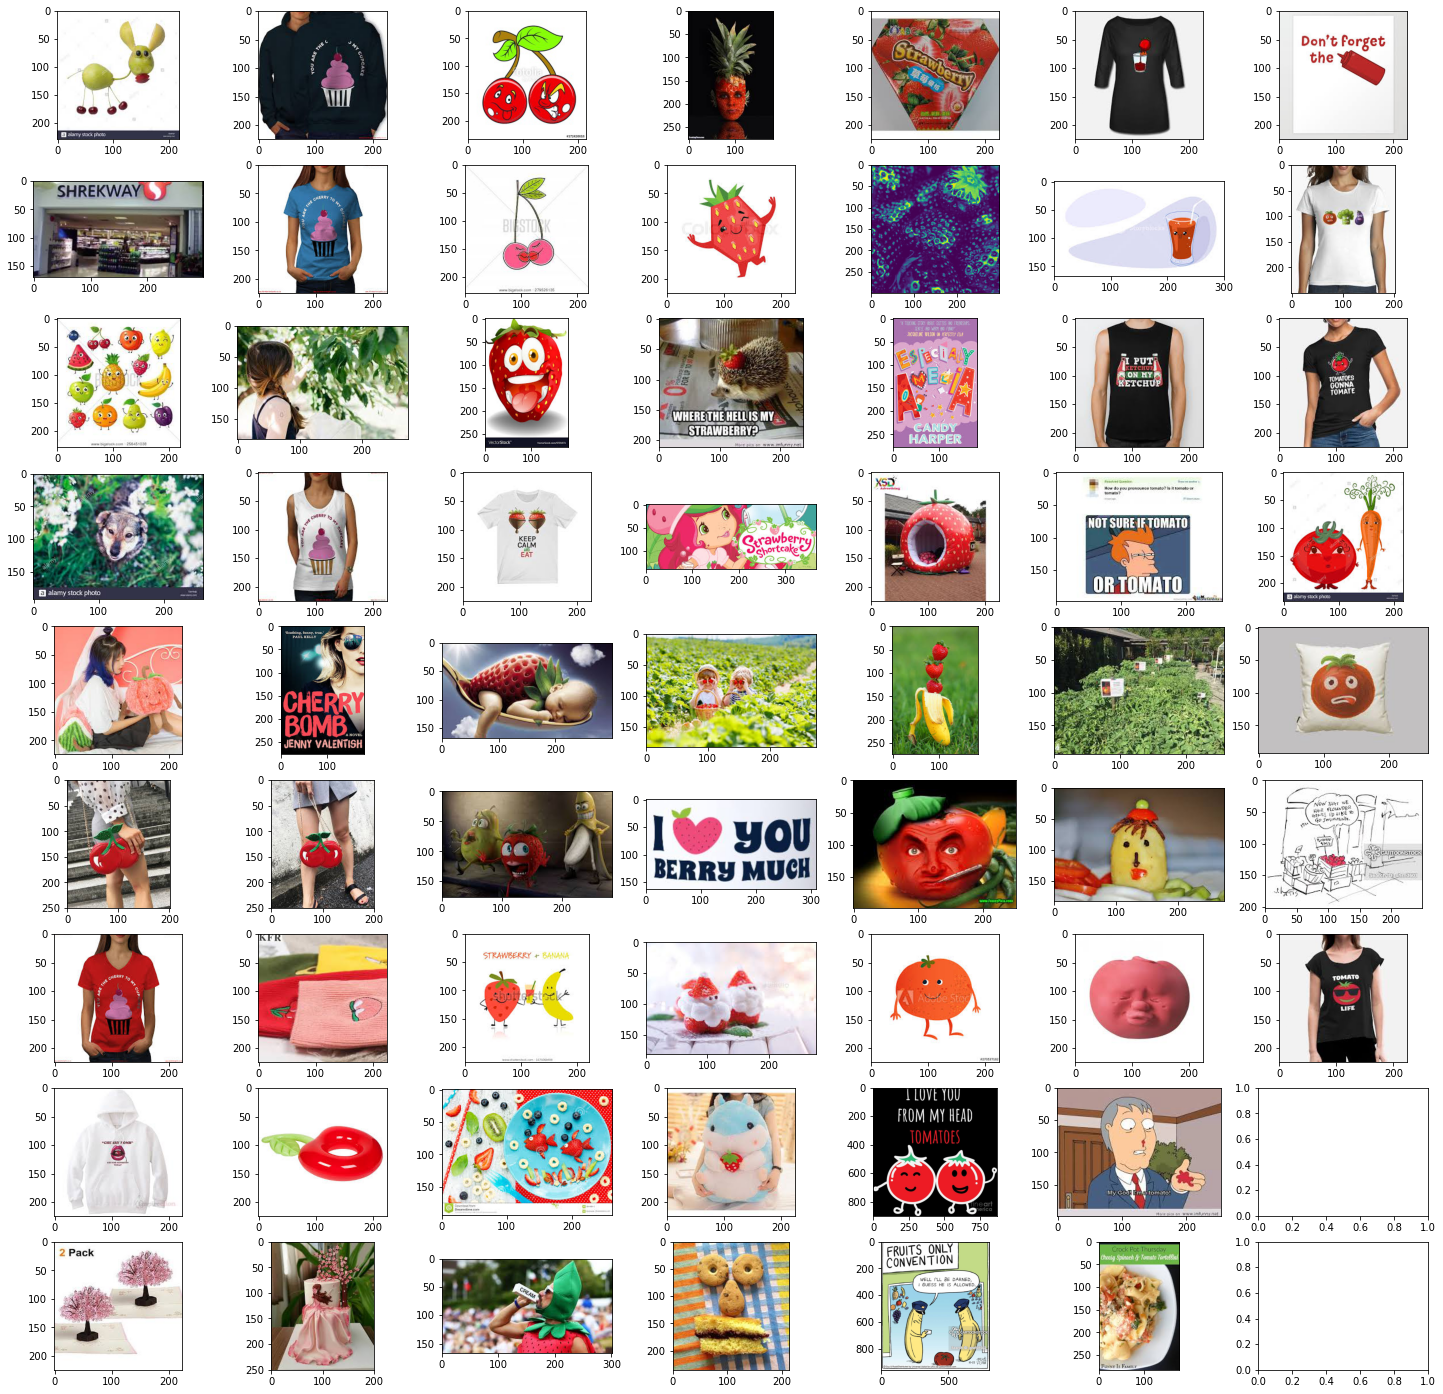

In [4]:
from matplotlib import pyplot as plt
import numpy as np

def show_image(img, ax=plt, title=None):
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None: ax.set_title(title)

fig, ax = plt.subplots(9,7, figsize=(25,25))
for i, image in enumerate(throwaway):
    show_image(image[0], ax=ax[i%9, i//9])

In [5]:
def show_channel(img, ax=plt, title=None):
    npimg = img.numpy()
    ax.imshow(npimg, cmap="gray")
    if title is not None: ax.set_title(title)

def plot_image_channels(img_tensor):
    fig, ax = plt.subplots(2,4, figsize=(10,5))
    show_image(img_tensor, ax[0,0], title="RGB")
    red = img_tensor[0]
    show_channel(red, ax[0, 1], title="Red")
    green = img_tensor[1]
    show_channel(green, ax[0, 2], title="Green")
    blue = img_tensor[2]
    show_channel(blue, ax[0, 3], title="Blue")
    greyscale = (red + green + blue) / 3
    show_channel(greyscale, ax[1,0], title="Greyscale")
    rg_diff = (red - green) / 2 + 0.5
    show_channel(rg_diff, ax[1,1], title="R-G difference")
    rb_diff = (red - blue) / 2 + 0.5
    show_channel(rb_diff, ax[1,2], title="R-B difference")
    gb_diff = (green - blue) / 2 + 0.5
    show_channel(gb_diff, ax[1,3], title="G-B difference")
    fig.tight_layout()

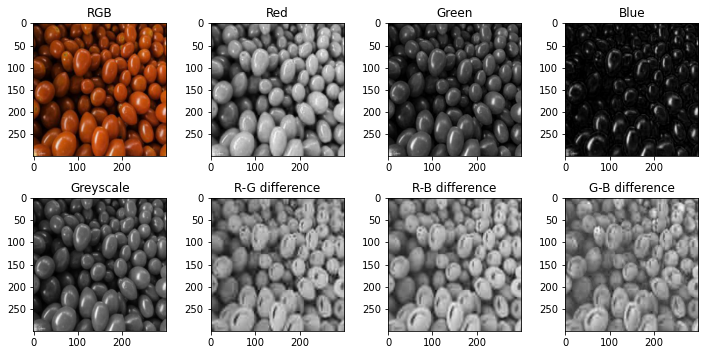

In [6]:
plot_image_channels(X_train[y_train.index('cherry')+21])

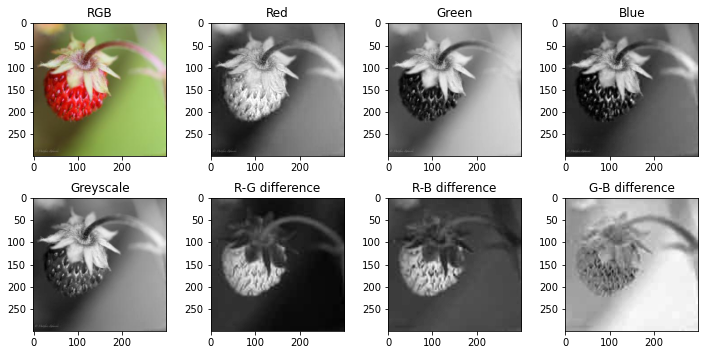

In [7]:
plot_image_channels(X_train[y_train.index('strawberry')+17])

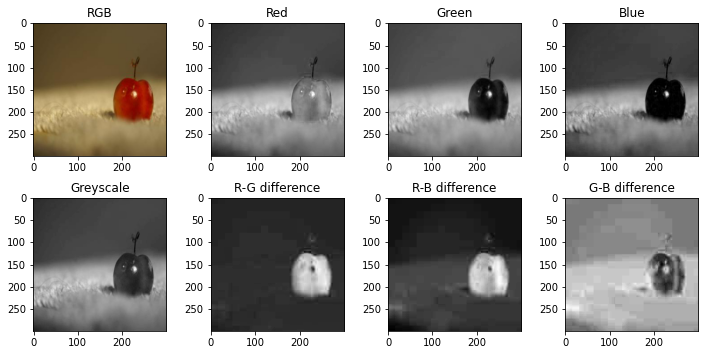

In [7]:
plot_image_channels(X_train[y_train.index('tomato') + 9])

In [6]:
def create_delta_channels(data):
    result = torch.zeros((len(data), 6, 300, 300))
    red = torch.clone(data[:, 0, :, :])
    green = torch.clone(data[:, 1, :, :])
    blue = torch.clone(data[:, 2, :, :])
    result[:, 0:3, :, :] = torch.clone(data)
    result[:, 3, :, :] = (red - green) / 2.0 + 0.5
    result[:, 4, :, :] = (red - blue) / 2.0 + 0.5
    result[:, 5, :, :] = (green - blue) / 2.0 + 0.5
    return result

X_train_proc = create_delta_channels(X_train)
X_val_proc = create_delta_channels(X_val)

In [10]:
def plot_image_channels2(img_tensor):
    fig, ax = plt.subplots(2,4, figsize=(10,5))
    show_image(img_tensor[0:3], ax[0,0], title="RGB")
    red = img_tensor[0]
    show_channel(red, ax[0, 1], title="Red")
    green = img_tensor[1]
    show_channel(green, ax[0, 2], title="Green")
    blue = img_tensor[2]
    show_channel(blue, ax[0, 3], title="Blue")
    greyscale = (red + green + blue) / 3
    show_channel(greyscale, ax[1,0], title="Greyscale")
    rg_diff = img_tensor[3]
    show_channel(rg_diff, ax[1,1], title="R-G difference")
    rb_diff = img_tensor[4]
    show_channel(rb_diff, ax[1,2], title="R-B difference")
    gb_diff = img_tensor[5]
    show_channel(gb_diff, ax[1,3], title="G-B difference")
    fig.tight_layout()

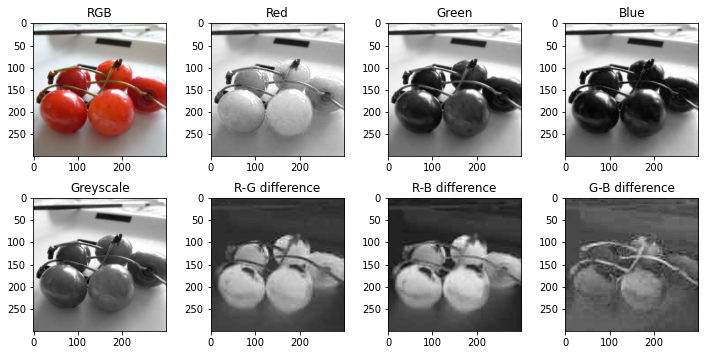

In [11]:
plot_image_channels2(X_train_proc[y_train.index('cherry') + 8])

In [7]:
from torch.nn import functional as F

X_train_proc2 = F.interpolate(X_train_proc, size=100)

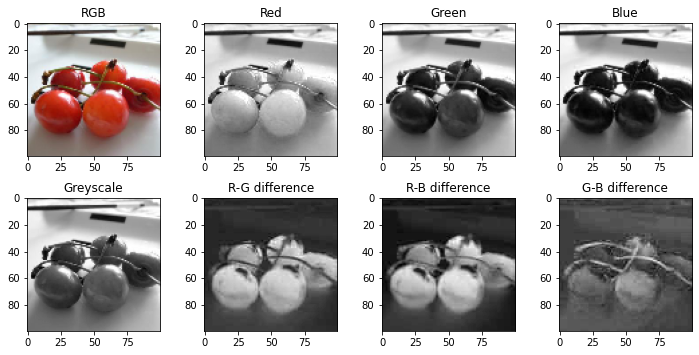

In [14]:
plot_image_channels2(X_train_proc2[y_train.index('cherry') + 8])

In [8]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder

labeller = LabelEncoder().fit(y_train)
y_train_proc = labeller.transform(y_train)
y_val_proc = labeller.transform(y_val)
dataset = TensorDataset(X_train,
                        torch.tensor(y_train_proc))
loader = DataLoader(dataset, batch_size=5, shuffle=True, num_workers=8)

In [26]:
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

class MLP(nn.Module):
    def __init__(self, channels, size):
        super().__init__()
        self.fc1 = nn.Linear(channels * size * size, 250)
        self.fc2 = nn.Linear(250, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

mlp = MLP(3, 300)
mlp_optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)
loss0 = []
train_acc0 = []
val_acc0 = []

In [27]:
def accuracy_score(model, X, y):
    count = 0
    for i in range(0, len(X), 50):
        j = min(i+50, len(X))
        out = model(X[i:j])
        pred = torch.argmax(out, dim=1)
        for p in range(0, j-i):
            if y[i+p] == pred[p].item(): count += 1

    return count / len(y)

In [28]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        mlp_optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        mlp_optimizer.step()

        # print statistics
        loss0.append(loss.item())
        running_loss += loss.item()
        checkin = 100
        if i % checkin == checkin-1:    # print every 200 mini-batches
            print('[%d, %7d] loss: %.3f' %
                  (epoch, i, running_loss / checkin))
            running_loss = 0.0

    train_acc = accuracy_score(mlp, X_train, y_train_proc)
    print("Epoch", epoch, "train accuracy =", train_acc)
    train_acc0.append(train_acc)

    val_acc = accuracy_score(mlp, X_val, y_val_proc)
    print("Epoch", epoch, "val accuracy =", val_acc)
    val_acc0.append(val_acc)

[0,      99] loss: 1.108
[0,     199] loss: 1.106
[0,     299] loss: 1.100
[0,     399] loss: 1.106
[0,     499] loss: 1.097
[0,     599] loss: 1.088
Epoch 0 train accuracy = 0.3405214032829096
Epoch 0 val accuracy = 0.34984984984984985
[1,      99] loss: 1.099
[1,     199] loss: 1.091
[1,     299] loss: 1.075
[1,     399] loss: 1.097
[1,     499] loss: 1.089
[1,     599] loss: 1.061
Epoch 1 train accuracy = 0.4296749275828774
Epoch 1 val accuracy = 0.39864864864864863
[2,      99] loss: 1.071
[2,     199] loss: 1.061
[2,     299] loss: 1.077
[2,     399] loss: 1.078
[2,     499] loss: 1.072
[2,     599] loss: 1.053
Epoch 2 train accuracy = 0.4895397489539749
Epoch 2 val accuracy = 0.45645645645645644
[3,      99] loss: 1.071
[3,     199] loss: 1.068
[3,     299] loss: 1.031
[3,     399] loss: 1.049
[3,     499] loss: 1.054
[3,     599] loss: 1.070
Epoch 3 train accuracy = 0.38879948503379463
Epoch 3 val accuracy = 0.3761261261261261
[4,      99] loss: 1.025
[4,     199] loss: 1.049
[4

Text(0.5, 0, 'Epoch')

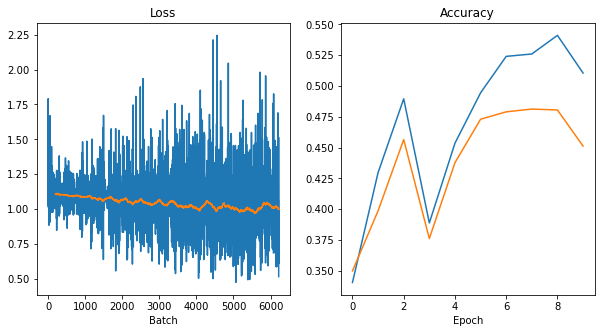

In [29]:
def rolling_mean(a, n=10):
    ans = np.cumsum(a)
    ans[n:] = ans[n:] - ans[:-n]
    return ans[n-1:] /n

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(loss0)
ax[0].plot(np.arange(199, len(loss0)), rolling_mean(loss0, 200))
ax[0].set_title("Loss")
ax[0].set_xlabel("Batch")
ax[1].plot(train_acc0)
ax[1].plot(val_acc0)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")

In [30]:
class BaseCNN(nn.Module):
    def __init__(self, channels, size):
        super().__init__()
        kernel_width = 5
        kernel_size = (kernel_width, kernel_width)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(channels, 24, kernel_size)
        self.conv2 = nn.Conv2d(24, 4, kernel_size)
        new_size = int(((size-kernel_width+1)/2-kernel_width+1)/2)
        self.fc1 = nn.Linear(4 * new_size * new_size, 50)
        self.fc2 = nn.Linear(50, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn1 = BaseCNN(3, 300)
cnn1_optimizer = optim.SGD(cnn1.parameters(), lr=0.01, momentum=0.5)
loss1 = []
train_acc1 = []
val_acc1 = []

In [ ]:
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        cnn1_optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn1(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        cnn1_optimizer.step()

        # print statistics
        loss1.append(loss.item())
        running_loss += loss.item()
        checkin = 100
        if i % checkin == checkin-1:    # print every 200 mini-batches
            print('[%d, %7d] loss: %.3f' %
                  (epoch, i, running_loss / checkin))
            running_loss = 0.0

    train_acc = accuracy_score(cnn1, X_train, y_train_proc)
    print("Epoch", epoch, "train accuracy =", train_acc)
    train_acc1.append(train_acc)

    val_acc = accuracy_score(cnn1, X_val, y_val_proc)
    print("Epoch", epoch, "val accuracy =", val_acc)
    val_acc1.append(val_acc)

[0,      99] loss: 1.106
[0,     199] loss: 1.102
[0,     299] loss: 1.100
[0,     399] loss: 1.100
[0,     499] loss: 1.100
[0,     599] loss: 1.100
Epoch 0 train accuracy = 0.33633730286449953
Epoch 0 val accuracy = 0.32432432432432434
[1,      99] loss: 1.099
[1,     199] loss: 1.098
[1,     299] loss: 1.101
[1,     399] loss: 1.100
[1,     499] loss: 1.100
[1,     599] loss: 1.099
Epoch 1 train accuracy = 0.3331187640811072
Epoch 1 val accuracy = 0.3340840840840841
[2,      99] loss: 1.100
[2,     199] loss: 1.100
[2,     299] loss: 1.100
[2,     399] loss: 1.099
[2,     499] loss: 1.100
[2,     599] loss: 1.100
Epoch 2 train accuracy = 0.3331187640811072
Epoch 2 val accuracy = 0.3340840840840841
[3,      99] loss: 1.100
[3,     199] loss: 1.100
[3,     299] loss: 1.100
[3,     399] loss: 1.099
[3,     499] loss: 1.101
[3,     599] loss: 1.100
Epoch 3 train accuracy = 0.33665915674283875
Epoch 3 val accuracy = 0.32507507507507505
[4,      99] loss: 1.100
[4,     199] loss: 1.100
[4

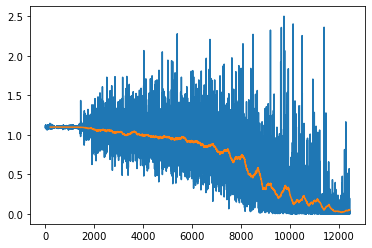

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(loss1)
ax[0].plot(np.arange(199, len(loss1)), rolling_mean(loss1, 200))
ax[0].set_title("Loss")
ax[0].set_xlabel("Batch")
ax[1].plot(train_acc1)
ax[1].plot(val_acc1)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")

In [21]:
cnn2 = BaseCNN(4, 300)
cnn2_optimizer = optim.SGD(cnn2.parameters(), lr=0.001, momentum=0.5)
history2 = []
rg_dataset = TensorDataset(X_train_proc[:, [0,1,2,3], :, :], torch.tensor(transform))
rg_loader = DataLoader(rg_dataset, batch_size=5, shuffle=True, num_workers=8)

In [22]:
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(rg_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        cnn2_optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn2(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        cnn2_optimizer.step()

        # print statistics
        history2.append(loss.item())
        running_loss += loss.item()
        checkin = 100
        if i % checkin == checkin-1:    # print every 200 mini-batches
            print('[%d, %7d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / checkin))
            running_loss = 0.0

[1,     100] loss: 1.100
[1,     200] loss: 1.099
[1,     300] loss: 1.103
[1,     400] loss: 1.100
[1,     500] loss: 1.097
[1,     600] loss: 1.100
[2,     100] loss: 1.099
[2,     200] loss: 1.099
[2,     300] loss: 1.098
[2,     400] loss: 1.098
[2,     500] loss: 1.097
[2,     600] loss: 1.095
[3,     100] loss: 1.097
[3,     200] loss: 1.095
[3,     300] loss: 1.094
[3,     400] loss: 1.095
[3,     500] loss: 1.090
[3,     600] loss: 1.090
[4,     100] loss: 1.090
[4,     200] loss: 1.084
[4,     300] loss: 1.075
[4,     400] loss: 1.079
[4,     500] loss: 1.067
[4,     600] loss: 1.068
[5,     100] loss: 1.058
[5,     200] loss: 1.063
[5,     300] loss: 1.060
[5,     400] loss: 1.052
[5,     500] loss: 1.007
[5,     600] loss: 1.037
[6,     100] loss: 1.035
[6,     200] loss: 1.034
[6,     300] loss: 1.038
[6,     400] loss: 1.023
[6,     500] loss: 1.001
[6,     600] loss: 1.009
[7,     100] loss: 1.004
[7,     200] loss: 1.030
[7,     300] loss: 1.007
[7,     400] loss: 1.005


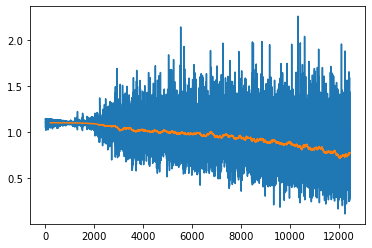

In [23]:
fig, ax = plt.subplots(1,1)
ax.plot(history2)
ax.plot(np.arange(199, len(history2)), rolling_mean(history2, 200))

tensor([1, 0, 2, 0, 0])
tensor([1, 0, 2, 0, 0])
tensor([0, 1, 0, 0, 1])
tensor([0, 1, 0, 0, 1])
tensor([0, 2, 1, 0, 0])
tensor([0, 2, 1, 0, 0])
tensor([0, 0, 1, 0, 0])
tensor([0, 0, 1, 0, 0])
tensor([0, 2, 2, 1, 1])
tensor([0, 2, 2, 1, 1])
tensor([1, 0, 1, 0, 2])
tensor([1, 0, 1, 0, 2])
tensor([1, 0, 2, 0, 2])
tensor([1, 0, 2, 0, 2])
tensor([2, 1, 2, 1, 0])
tensor([2, 1, 2, 1, 0])
tensor([0, 2, 1, 2, 1])
tensor([0, 2, 1, 2, 1])
tensor([0, 0, 2, 1, 0])
tensor([0, 0, 2, 1, 0])
tensor([0, 2, 2, 2, 1])
tensor([0, 2, 2, 2, 1])
tensor([0, 0, 1, 2, 1])
tensor([0, 0, 1, 2, 1])
tensor([0, 0, 1, 2, 2])
tensor([0, 0, 1, 2, 2])
tensor([0, 0, 2, 1, 2])
tensor([0, 0, 2, 1, 2])
tensor([1, 0, 1, 1, 0])
tensor([1, 0, 1, 1, 0])
tensor([2, 2, 2, 2, 2])
tensor([2, 2, 2, 2, 2])
tensor([2, 2, 2, 0, 1])
tensor([2, 2, 2, 0, 1])
tensor([2, 1, 2, 0, 2])
tensor([2, 1, 2, 0, 2])
tensor([0, 0, 1, 1, 0])
tensor([0, 0, 1, 1, 0])
tensor([0, 2, 0, 2, 1])
tensor([0, 2, 0, 2, 1])
tensor([1, 1, 2, 0, 0])
tensor([1, 1, 2,

KeyboardInterrupt: 

In [76]:
from torch.autograd import Variable
from torchvision.transforms import Normalize

def sobel(img):
    vertical = np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
    vert_conv = nn.Conv2d(1,1, kernel_size=(3,3), stride=(1,1), padding=1, bias=False)
    vert_conv.weight = nn.Parameter(torch.from_numpy(vertical).float().unsqueeze(0).unsqueeze(0))
    horizontal = np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
    hori_conv = nn.Conv2d(1,1, kernel_size=(3,3), stride=(1,1), padding=1, bias=False)
    hori_conv.weight = nn.Parameter(torch.from_numpy(horizontal).float().unsqueeze(0).unsqueeze(0))

    img = torch.unbind(img.squeeze(0))[0].unsqueeze(0).unsqueeze(0)
    G_x = vert_conv(Variable(img)).data.view(1,img.shape[2],img.shape[3])
    G_y = hori_conv(Variable(img)).data.view(1,img.shape[2],img.shape[3])
    G = torch.sqrt(torch.pow(G_x,2) + torch.pow(G_y,2))

    normalise = Normalize(mean=[0.5], std=[0.5])
    return normalise(G)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

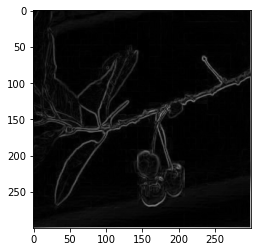

In [78]:
show_channel(sobel(X_train[0])[0])

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

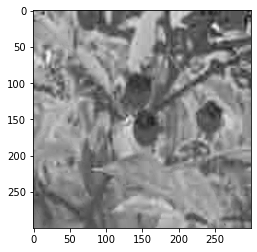

In [63]:
img = iter(rg_loader).next()
show_channel(img[0][0][1])